# Analysis notebook for mapping evaluation

Assumes results generated - see Makefile for details

In [1]:
task = "fbbt-zfa"
#task = "fbbt-wbbt"
#task = "hsapdv-mmusdv"

In [2]:
# Parameters
task = "fbbt-wbbt"


In [3]:
import pandas as pd

In [4]:
%run md_utils.py

## Utility SSSOM loading methods

In [5]:
def task_method_sssom_path(method: str):
    if method == "curated":
        dir = "data"
    else:
        dir = "results"
    return f"../{dir}/{method}-{task}.sssom.tsv"

In [6]:
def load_sssom(method):
    path = task_method_sssom_path(method)
    df = pd.read_csv(path, sep="\t", comment="#")
    df["mapping_source"]  = method
    if method == "lexmatch":
        df[["predicate_id"]] = "skos:exactMatch"
    return df.drop_duplicates()

lexmatch = load_sssom("lexmatch")
lexmatch

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,organism,lexmatch
1,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,head,lexmatch
2,FBbt:00000034,egg,skos:exactMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,lexmatch
3,FBbt:00000092,primordial germ cell,skos:exactMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,lexmatch
4,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000066,lexmatch
...,...,...,...,...,...,...,...,...,...,...,...,...
253,FBbt:00111153,adult posterior brain cell body rind,skos:exactMatch,WBbt:0004405,PCBR,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,rdfs:label,pcbr,lexmatch
254,FBbt:00111201,dopaminergic medulla neuron,skos:exactMatch,WBbt:0003638,MC neuron,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,rdfs:label,mc neuron,lexmatch
255,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:exactMatch,WBbt:0006512,Da,semapv:LexicalMatching,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,da,lexmatch
256,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:exactMatch,WBbt:0006718,Dp,semapv:LexicalMatching,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,dp,lexmatch


In [7]:
lexmatch.groupby(["subject_match_field", "object_match_field"]).count()

subject_id  subject_label  \
subject_match_field   object_match_field                                 
oio:hasBroadSynonym   oio:hasRelatedSynonym           7              7   
                      rdfs:label                     21             21   
oio:hasDbXref         oio:hasDbXref                   7              7   
                      oio:hasDbXref-INVERSE           9              9   
oio:hasDbXref-INVERSE oio:hasDbXref                   1              1   
                      oio:hasDbXref-INVERSE           9              9   
oio:hasExactSynonym   oio:hasRelatedSynonym          16             16   
                      rdfs:label                    104            104   
oio:hasNarrowSynonym  rdfs:label                      3              3   
oio:hasRelatedSynonym oio:hasRelatedSynonym           6              6   
                      rdfs:label                     14             14   
rdfs:label            oio:hasRelatedSynonym          11             11   
                      rdfs:label                     49             49   

                                             predicate_id  object_id  \
subject_match_field   object_match_field                               
oio:hasBroadSynonym   oio:hasRelatedSynonym             7          7   
                      rdfs:label                       21         21   
oio:hasDbXref         oio:hasDbXref                     7          7   
                      oio:hasDbXref-INVERSE             9          9   
oio:hasDbXref-INVERSE oio:hasDbXref                     1          1   
                      oio:hasDbXref-INVERSE             9          9   
oio:hasExactSynonym   oio:hasRelatedSynonym            16         16   
                      rdfs:label                      104        104   
oio:hasNarrowSynonym  rdfs:label                        3          3   
oio:hasRelatedSynonym oio:hasRelatedSynonym             6          6   
                      rdfs:label                       14         14   
rdfs:label            oio:hasRelatedSynonym            11         11   
                      rdfs:label                       49         49   

                                             object_label  \
subject_match_field   object_match_field                    
oio:hasBroadSynonym   oio:hasRelatedSynonym             7   
                      rdfs:label                       21   
oio:hasDbXref         oio:hasDbXref                     7   
                      oio:hasDbXref-INVERSE             9   
oio:hasDbXref-INVERSE oio:hasDbXref                     1   
                      oio:hasDbXref-INVERSE             9   
oio:hasExactSynonym   oio:hasRelatedSynonym            16   
                      rdfs:label                      104   
oio:hasNarrowSynonym  rdfs:label                        3   
oio:hasRelatedSynonym oio:hasRelatedSynonym             6   
                      rdfs:label                       14   
rdfs:label            oio:hasRelatedSynonym            11   
                      rdfs:label                       49   

                                             mapping_justification  \
subject_match_field   object_match_field                             
oio:hasBroadSynonym   oio:hasRelatedSynonym                      7   
                      rdfs:label                                21   
oio:hasDbXref         oio:hasDbXref                              7   
                      oio:hasDbXref-INVERSE                      9   
oio:hasDbXref-INVERSE oio:hasDbXref                              1   
                      oio:hasDbXref-INVERSE                      9   
oio:hasExactSynonym   oio:hasRelatedSynonym                     16   
                      rdfs:label                               104   
oio:hasNarrowSynonym  rdfs:label                                 3   
oio:hasRelatedSynonym oio:hasRelatedSynonym                      6   
                      rdfs:label                                14   
rdfs:label            oio:h

In [8]:
curated = load_sssom("curated")
curated

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000468,curated
4,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000468,curated
20,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000033,curated
24,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000033,curated
40,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000066,curated
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,FBbt:00047153,anus,skos:exactMatch,WBbt:0005364,anus,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0001245,curated
1240,FBbt:00100291,glutamatergic neuron,skos:exactMatch,WBbt:0006829,glutamatergic neuron,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000679,curated
1249,FBbt:00100291,glutamatergic neuron,skos:exactMatch,WBbt:0006829,glutamatergic neuron,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,cl:0000679,curated
1330,FBbt:10000000,anatomical entity,skos:exactMatch,WBbt:0000100,C. elegans anatomical entity,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0001062,curated


In [9]:
gpt3 = load_sssom("gpt3")
gpt3

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:broadMatch,WBbt:0007833,organism,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,organism,gpt3
1,FBbt:00000004,head,owl:differentFrom,WBbt:0005739,head,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,head,gpt3
2,FBbt:00000034,egg,skos:exactMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,gpt3
3,FBbt:00000092,primordial germ cell,skos:relatedMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,gpt3
4,FBbt:00000124,epithelial cell,skos:relatedMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000066,gpt3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,FBbt:00111153,adult posterior brain cell body rind,owl:differentFrom,WBbt:0004405,PCBR,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,rdfs:label,pcbr,gpt3
227,FBbt:00111201,dopaminergic medulla neuron,owl:differentFrom,WBbt:0003638,MC neuron,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,rdfs:label,mc neuron,gpt3
228,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,WBbt:0006512,Da,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,da,gpt3
229,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:relatedMatch,WBbt:0006718,Dp,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,dp,gpt3


In [10]:
gpt4 = load_sssom("gpt4")
gpt4

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,organism,gpt4
1,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,head,gpt4
2,FBbt:00000034,egg,skos:narrowMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,gpt4
3,FBbt:00000092,primordial germ cell,skos:exactMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,gpt4
4,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000066,gpt4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,FBbt:00111153,adult posterior brain cell body rind,owl:differentFrom,WBbt:0004405,PCBR,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,rdfs:label,pcbr,gpt4
227,FBbt:00111201,dopaminergic medulla neuron,owl:differentFrom,WBbt:0003638,MC neuron,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,rdfs:label,mc neuron,gpt4
228,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,WBbt:0006718,Dp,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,dp,gpt4
229,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:relatedMatch,WBbt:0006512,Da,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasNarrowSynonym,rdfs:label,da,gpt4


In [11]:
pd.concat([gpt3, gpt4]).groupby(["mapping_source", "predicate_id"]).count()

subject_id  subject_label  object_id  \
mapping_source predicate_id                                              
gpt3           owl:differentFrom         106            106        106   
               skos:broadMatch             7              7          7   
               skos:exactMatch            34             34         34   
               skos:narrowMatch           10             10         10   
               skos:relatedMatch          74             74         74   
gpt4           owl:differentFrom         139            139        139   
               skos:broadMatch             2              2          2   
               skos:exactMatch            53             53         53   
               skos:narrowMatch            3              3          3   
               skos:relatedMatch          34             34         34   

                                  object_label  mapping_justification  \
mapping_source predicate_id                                             
gpt3           owl:differentFrom           106                    106   
               skos:broadMatch               7                      7   
               skos:exactMatch              34                     34   
               skos:narrowMatch             10                     10   
               skos:relatedMatch            74                     74   
gpt4           owl:differentFrom           139                    139   
               skos:broadMatch               2                      2   
               skos:exactMatch              53                     53   
               skos:narrowMatch              3                      3   
               skos:relatedMatch            34                     34   

                                  subject_source  object_source  mapping_tool  \
mapping_source predicate_id                                                     
gpt3           owl:differentFrom             106            106           106   
               skos:broadMatch                 7              7             7   
               skos:exactMatch                34             34            34   
               skos:narrowMatch               10             10            10   
               skos:relatedMatch              74             74            74   
gpt4           owl:differentFrom             139            139           139   
               skos:broadMatch                 2              2             2   
               skos:exactMatch                53             53            53   
               skos:narrowMatch                3              3             3   
               skos:relatedMatch              34             34            34   

                                  confidence  subject_match_field  \
mapping_source predicate_id                                         
gpt3           owl:differentFrom         106                  106   
               skos:broadMatch             7                    7   
               skos:exactMatch            34                   34   
               skos:narrowMatch           10                   10   
               skos:relatedMatch          74                   74   
gpt4           owl:differentFrom         139                  139   
               skos:broadMatch             2                    2   
               skos:exactMatch            53                   53   
               skos:narrowMatch            3                    3   
               skos:relatedMatch          34                   34   

                                  object_match_field  match_string  
mapping_source predicate_id                                         
gpt3           owl:differentFrom                 106           106  
               skos:broadMatch                     7             7  
               skos:exactMatch                    34            34  
               skos:narrowMatch                   10            10  
               skos:relatedMatch                  74

In [12]:
logmap = load_sssom("logmap")
logmap

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,FBbt:00004924,WBbt:0006760,0.75,skos:exactMatch,uterus,uterus,logmap
1,FBbt:00003682,WBbt:0003734,0.73,skos:exactMatch,bulb,isthmus,logmap
2,FBbt:00004921,WBbt:0005319,0.73,skos:exactMatch,spermatheca,spermatheca,logmap
3,FBbt:00005173,WBbt:0005762,0.52,skos:exactMatch,thecogen cell,accessory cell,logmap
4,FBbt:00005171,WBbt:0008418,0.81,skos:exactMatch,tormogen cell,IL socket cell,logmap
...,...,...,...,...,...,...,...
95,FBbt:00000092,WBbt:0006849,0.60,skos:exactMatch,primordial germ cell,germline precursor cell,logmap
96,FBbt:00003556,WBbt:0005828,0.63,skos:exactMatch,gonadal sheath muscle cell,gonadal sheath cell,logmap
97,FBbt:00001448,WBbt:0006860,0.49,skos:exactMatch,pCC neuron,PCC,logmap
98,FBbt:00003708,WBbt:0005756,0.69,skos:exactMatch,lamina,basal lamina,logmap


In [13]:
def filter_logmap(df, thresh: float):
    return df.query(f"confidence > {thresh}")
filter_logmap(logmap, 0.8)

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
4,FBbt:00005171,WBbt:0008418,0.81,skos:exactMatch,tormogen cell,IL socket cell,logmap
6,FBbt:00007152,WBbt:0006929,0.88,skos:exactMatch,sensillum,sensillum,logmap
8,FBbt:00004826,WBbt:0008422,0.89,skos:exactMatch,genitalia,sex organ,logmap
11,FBbt:00004856,WBbt:0005746,0.86,skos:exactMatch,organ system,Organ system,logmap
14,FBbt:00004936,WBbt:0006799,0.96,skos:exactMatch,spermatocyte,spermatocyte,logmap
15,FBbt:00005286,WBbt:0008591,0.93,skos:exactMatch,primary spermatocyte,primary spermatocyte,logmap
20,FBbt:00007004,WBbt:0007850,0.89,skos:exactMatch,male organism,male,logmap
21,FBbt:00007002,WBbt:0004017,0.81,skos:exactMatch,cell,Cell,logmap
22,FBbt:00007001,WBbt:0005766,0.91,skos:exactMatch,anatomical structure,Anatomy,logmap
23,FBbt:00004968,WBbt:0005337,0.87,skos:exactMatch,vas deferens,vas deferens,logmap


In [14]:
def evaluate(results, gold):
    # filtered = results.query("predicate_id != 'owl:differentFrom'")
    filtered = results.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "object_id"]
    results_set = set([tuple(x) for x in filtered[cols].values])
    gold_set = set([tuple(x) for x in gold[cols].values])

    # Calculate TP, FP, FN
    TP = len(results_set.intersection(gold_set))
    FP = len(results_set.difference(gold_set))
    FN = len(gold_set.difference(results_set))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate F1 score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return F1, precision, recall

evaluate(gpt3, curated)

(0.4266666666666667, 0.47058823529411764, 0.3902439024390244)

In [15]:
pairs = [(conf, evaluate(filter_logmap(logmap, conf), curated)[0]) for conf in sorted(set(pd.unique(logmap['confidence'])))]
pairs = sorted(pairs, key=lambda x: -x[1])
pairs[0:5]

[(0.72, 0.52),
 (0.74, 0.5054945054945056),
 (0.71, 0.5048543689320388),
 (0.69, 0.5),
 (0.68, 0.49056603773584906)]

In [16]:
logmap_best = filter_logmap(logmap, pairs[0][0])
logmap_best

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,FBbt:00004924,WBbt:0006760,0.75,skos:exactMatch,uterus,uterus,logmap
1,FBbt:00003682,WBbt:0003734,0.73,skos:exactMatch,bulb,isthmus,logmap
2,FBbt:00004921,WBbt:0005319,0.73,skos:exactMatch,spermatheca,spermatheca,logmap
4,FBbt:00005171,WBbt:0008418,0.81,skos:exactMatch,tormogen cell,IL socket cell,logmap
6,FBbt:00007152,WBbt:0006929,0.88,skos:exactMatch,sensillum,sensillum,logmap
8,FBbt:00004826,WBbt:0008422,0.89,skos:exactMatch,genitalia,sex organ,logmap
11,FBbt:00004856,WBbt:0005746,0.86,skos:exactMatch,organ system,Organ system,logmap
12,FBbt:00004857,WBbt:0005747,0.77,skos:exactMatch,reproductive system,reproductive system,logmap
13,FBbt:00007012,WBbt:0008628,0.73,skos:exactMatch,cell component,cell component,logmap
14,FBbt:00004936,WBbt:0006799,0.96,skos:exactMatch,spermatocyte,spermatocyte,logmap


In [17]:
def mk_results(dfs):
    combined = pd.concat(dfs)
    objs = []
    for df in dfs:
        methods = set(pd.unique(df["mapping_source"]))
        assert len(methods) == 1
        method = list(methods)[0]
        f1, p, r = evaluate(df, curated)
        objs.append({"method": method, "f1": f1, "P": p, "R": r})
    return pd.DataFrame(objs)
    
  

summary = mk_results([lexmatch, logmap_best, gpt3, gpt4])
#summary.to_markdown(f"main-results-{task}.md")
as_md_table(summary, f"table-main-results-{task}.md")
summary.style.highlight_max(props='font-weight:bold').format(precision=3)

,method,f1,P,R
0,lexmatch,0.257,0.152,0.854
1,logmap,0.520,0.441,0.634
2,gpt3,0.427,0.471,0.390
3,gpt4,0.660,0.585,0.756


In [18]:
import matplotlib.pyplot as plt

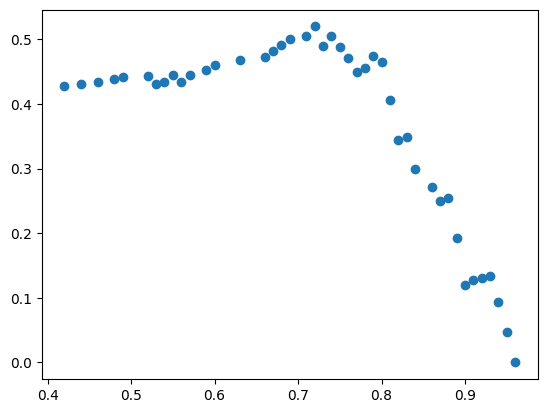

In [19]:
x, y = zip(*pairs)

# Create a scatter plot
plt.scatter(x, y)

# Show the plot
plt.show()

In [20]:
import seaborn as sns

/Users/matentzn/.pyenv/versions/3.10.4/envs/mappergpt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/matentzn/.pyenv/versions/3.10.4/envs/mappergpt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


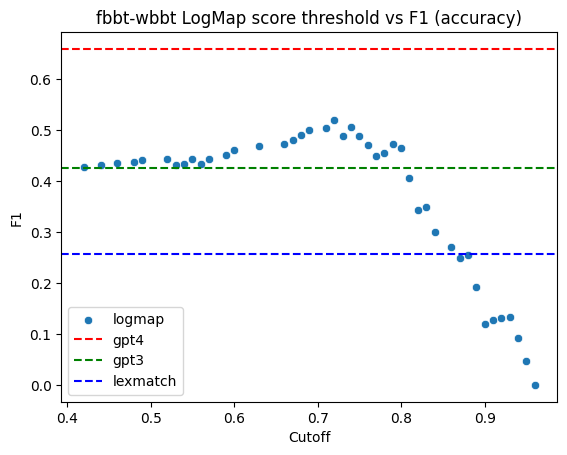

In [21]:
df = pd.DataFrame(pairs, columns=['Cutoff', 'F1'])

# Create a scatter plot
sns.scatterplot(data=df, x='Cutoff', y='F1', label="logmap")

lines = [(gpt4, "gpt4", "red"), (gpt3, "gpt3", "green"), (lexmatch, "lexmatch", "blue")]

for r, label, color in lines:
    plt.axhline(evaluate(r, curated)[0], color=color, linestyle='--', label=label)

plt.legend()

# Adding labels
plt.xlabel('Cutoff')
plt.ylabel('F1')
plt.title(f'{task} LogMap score threshold vs F1 (accuracy)')

plt.savefig(f"../content/images/logmap-scatter-plot-{task}.pdf", format='pdf')

# Show the plot
plt.show()

In [22]:
import plotly

In [23]:
import plotly.io as pio
pio.renderers.default='notebook'

In [24]:
plt.savefig(f"logmap-scatter-plot-{task}.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig(f"logmap-scatter-plot-{task}.png", format='png')

<Figure size 640x480 with 0 Axes>

In [26]:
def diffs(x, y):
    x2 = x.query("predicate_id == 'skos:exactMatch'")
    y2 = y.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "subject_label", "object_id", "object_label"]
    xset = set([tuple(v) for v in x2[cols].values])
    yset = set([tuple(v) for v in y2[cols].values])
    return xset-yset

diffs(logmap_best, gpt4)

{('FBbt:00000440', 'proctodeum', 'WBbt:0006795', 'proctodeum'),
 ('FBbt:00001000', 'gut suspension muscle cell', 'WBbt:0008599', 'G cell'),
 ('FBbt:00001102',
  'larval ventral nerve cord',
  'WBbt:0005829',
  'ventral nerve cord'),
 ('FBbt:00001408', 'neuroblast X', 'WBbt:0008594', 'neuroblast'),
 ('FBbt:00001454', 'RP2sib neuron', 'WBbt:0005359', 'SIB'),
 ('FBbt:00001590', 'V neuron', 'WBbt:0008597', 'V cell'),
 ('FBbt:00002614', 'abdominal 8 spC neuron', 'WBbt:0006861', 'SPC'),
 ('FBbt:00002615', 'abdominal 8 spD neuron', 'WBbt:0007805', 'SPD'),
 ('FBbt:00002684', 'associated organ', 'WBbt:0003760', 'organ'),
 ('FBbt:00003682', 'bulb', 'WBbt:0003734', 'isthmus'),
 ('FBbt:00003917', 'horizontal system neuron', 'WBbt:0008596', 'H cell'),
 ('FBbt:00004103', 'ventral group vA neuron', 'WBbt:0005339', 'VA neuron'),
 ('FBbt:00004921', 'spermatheca', 'WBbt:0005319', 'spermatheca'),
 ('FBbt:00004924', 'uterus', 'WBbt:0006760', 'uterus'),
 ('FBbt:00004958', 'seminal vesicle', 'WBbt:0006870',